In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from tensorflow import keras
layers = keras.layers

print("TensorFlow version", tf.__version__)

TensorFlow version 1.8.0


Using TensorFlow backend.


In [2]:
# create bag of words vocabulary for description
vocab_size = 12000
num_classes = 40
max_seq_length = 170

In [3]:
# wide model
bow_inputs = layers.Input(shape=(vocab_size,)) 
variety_inputs = layers.Input(shape=(num_classes,))
wide_inputs = layers.concatenate([bow_inputs, variety_inputs])
wide_inputs = layers.Dense(256, activation='relu')(wide_inputs)
predictions = layers.Dense(1)(wide_inputs)
wide_model = keras.Model(inputs=[bow_inputs, variety_inputs], outputs=predictions)
print(wide_model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 12000)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 12040)        0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          3082496     concatenate_1[0][0]              
__________

In [4]:
deep_inputs = layers.Input(shape=(max_seq_length,))
embedding = layers.Embedding(vocab_size, 8, input_length=max_seq_length)(deep_inputs)
embedding = layers.Flatten()(embedding)
embed_out = layers.Dense(1)(embedding)
deep_model = keras.Model(inputs=deep_inputs, outputs=embed_out)
print(deep_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 170)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 170, 8)            96000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1360)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1361      
Total params: 97,361
Trainable params: 97,361
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# Combine wide and deep into one model
merged_out = layers.concatenate([wide_model.output, deep_model.output])
merged_out = layers.Dense(1)(merged_out)
combined_model = keras.Model(wide_model.input + [deep_model.input], merged_out)
print(combined_model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 12000)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 170)          0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 12040)        0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________

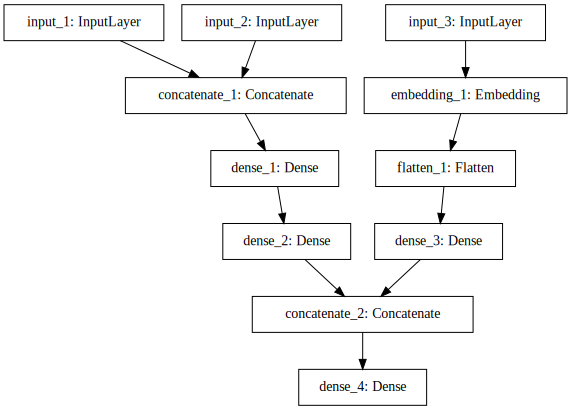

In [6]:
SVG(model_to_dot(combined_model).create(prog='dot', format='svg'))